In [37]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
# os.environ['PYTHONPATH'] += ':/content/gdrive/MyDrive/22FL/CS101-TA/optimized_bio_sensor/RockleyCodesign'
os.environ['PYTHONPATH'] += ':/content/gdrive/MyDrive/optimized_bio_sensor/rockley'
# %cd /content/gdrive/MyDrive/22FL/CS101-TA/optimized_bio_sensor/RockleyCodesign
%cd /content/gdrive/MyDrive/optimized_bio_sensor/rockley

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1EaHvULJYewcfEpQ7wlYgmG1eRbVcahUv/optimized_bio_sensor/rockley


In [39]:
idxs = [38, 92, 184, 104, 111, 61, 157, 166, 101, 189, 163, 1, 99, 74, 33, 116, 145, 186, 132, 118, 32, 63, 171, 19, 75, 0, 183, 155, 96, 125, 127, 131, 2, 5, 135, 133, 13, 98, 17, 26, 97, 91, 79, 83, 88, 41, 49, 58, 55, 57]

In [41]:
from sklearn.linear_model import LinearRegression
import sklearn

import utils.data as data_loader
 
train, val, test = data_loader.load_train_test_val(
    trainfile="../data/train_regression.parquet",
    testfile="../data/test_regression.parquet",
    standardize=True,
    precision=32,
    noise=1e-5
)

Xtrain, Ytrain = train
Xval, Yval = val
Xtest, Ytest = test

for i in range(20, 60, 10):
  regr = LinearRegression()
  regr.fit(Xtrain[:, sorted(idxs[:i])], Ytrain)
  print(sklearn.metrics.mean_squared_error(regr.predict(Xval[:, sorted(idxs[:i])]), Yval))

1354.8607
111.74309
51.96142
45.237556


# Comparison of Indices

In [5]:
norm_idxs = [50, 91, 97, 9, 33, 29, 49, 45, 46, 48, 47, 32, 6, 44, 90, 34, 95, 87, 11, 15, 191, 26, 141, 30, 192, 103, 8, 111, 31, 99, 190, 187, 172, 148, 189, 28, 142, 23, 158, 117, 22, 196, 139, 89, 3, 27, 195, 51, 55, 144]

In [6]:
reverse_idxs = [38, 92, 184, 104, 111, 61, 157, 166, 101, 189, 163, 1, 99, 74, 33, 116, 145, 186, 132, 118, 32, 63, 171, 19, 75, 0, 183, 155, 96, 125, 127, 131, 2, 5, 135, 133, 13, 98, 17, 26, 97, 91, 79, 83, 88, 41, 49, 58, 55, 57]

In [10]:
codesign_idxs = [0, 2, 3, 15, 18, 22, 33, 37, 38, 40, 41, 42, 45, 47, 48, 49, 50, 54, 61, 67, 72, 78, 83, 86, 87, 89, 92, 93, 95, 96, 100, 101, 102, 110, 113, 125, 128, 140, 148, 151, 153, 155, 162, 163, 164, 166, 167, 172, 175, 182]

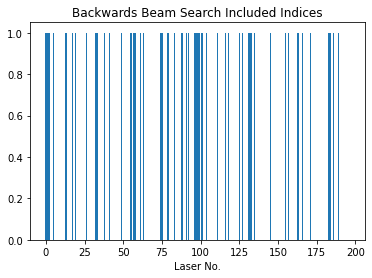

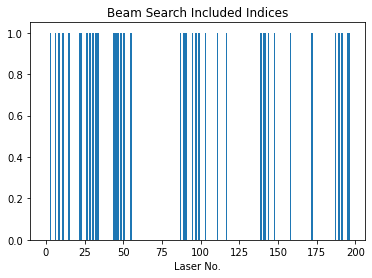

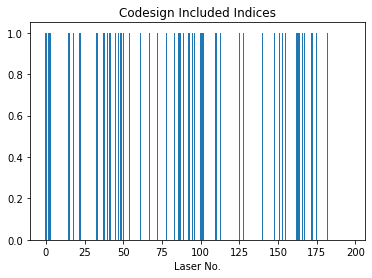

In [11]:
import matplotlib.pyplot as plt

norm_present = [1 if x in norm_idxs else 0 for x in range(197)]
rev_present = [1 if x in reverse_idxs else 0 for x in range(197)]
codesign_present = [1 if x in codesign_idxs else 0 for x in range(197)]

plt.bar([x for x in range(len(rev_present))], rev_present)
plt.title("Backwards Beam Search Included Indices")
plt.xlabel("Laser No.")
plt.show()

plt.bar([x for x in range(len(norm_present))], norm_present)
plt.title("Beam Search Included Indices")
plt.xlabel("Laser No.")
plt.show()

plt.bar([x for x in range(len(codesign_present))], codesign_present)
plt.title("Codesign Included Indices")
plt.xlabel("Laser No.")
plt.show()

## Compare Beam vs Backwards Beam

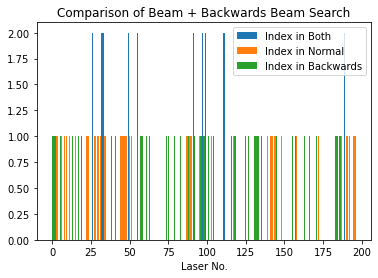

In [20]:
only_norm = []
only_rev = []
both = []
for i in range(197):
  if i in norm_idxs and i in reverse_idxs:
    both.append(2)
    only_norm.append(0)
    only_rev.append(0)
  elif i in norm_idxs:
    both.append(0)
    only_norm.append(1)
    only_rev.append(0)
  elif i in reverse_idxs:
    both.append(0)
    only_norm.append(0)
    only_rev.append(1)
  else:
    both.append(0)
    only_norm.append(0)
    only_rev.append(0)

plt.bar([x for x in range(len(both))], both)
plt.bar([x for x in range(len(only_norm))], only_norm)
plt.bar([x for x in range(len(only_rev))], only_rev)
plt.title("Comparison of Beam + Backwards Beam Search")
plt.xlabel("Laser No.")
plt.legend(["Index in Both", "Index in Normal", "Index in Backwards"])
plt.show()